## Task- 3

### Exploratory Data Analysis on Dataset - Terrorism  

#### Anchal Kapoor

### Problem Statement

As a security/defense analyst, try to find out the hot zone of terrorism.

#### Import Libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset...

In [2]:
data= pd.read_csv('globalterrorism.csv',encoding= 'latin-1' )
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# check the rows and columns...

print('Rows:',data.shape[0] )
print('Columns:',data.shape[1] )

Rows: 181691
Columns: 135


In [4]:
# check the last 5 rows...
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
# check the 5 point summary of the data...
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# check the decsription of categorical columns...
data.describe(include='object')

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181257,55495,115562,29011,181691,...,324,3305,514,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36674,44109,112492,5,9,...,143,217,387,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,...,27,687,36,3606,1607,205,134,139,78002,80


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Data Cleaning

In [9]:
# removing rows with >50% null values
cols = data.columns
cols

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
# using threshold to drop >50% nulls

thresh = len(data) * .5
data.dropna(thresh = thresh, axis = 1, inplace = True)

In [11]:
data.shape # decreased data a lot

(181691, 58)

In [12]:
data.isnull().sum()/len(data) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [13]:
# dropping duplicates
data.drop_duplicates() # this removes duplicates that are row based

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


In [14]:
data.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual          

In [15]:
int_cols=data.select_dtypes(include=np.number).columns.tolist()

In [16]:
# Filling data with respective medians and modes
for i in int_cols:
  data[i] = data[i].fillna(data[i].median())

In [17]:
data.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

In [18]:
string_cols=data.select_dtypes(include=object).columns.tolist()
string_cols

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'summary',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

In [19]:
for i in string_cols:
  print(data[i].describe())   
  print('--------------------')

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object
--------------------
count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: region_txt, dtype: object
--------------------
count      181270
unique       2855
top       Baghdad
freq         7645
Name: provstate, dtype: object
--------------------
count      181257
unique      36674
top       Unknown
freq         9775
Name: city, dtype: object
--------------------
count                                                115562
unique                                               112492
top       09/00/2016: Sometime between September 18, 201...
freq                                                    100
Name: summary, dtype: object
--------------------
count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: attacktype1_txt, dtype: ob

In [20]:
for i in ['provstate','city','target1','natlty1_txt']:
  data[i]=data[i].fillna(data[i].mode()[0])  # cause its string

In [21]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [22]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,...,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1


In [23]:
 # taking required columns for my analysis
data=data[['iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid','dbsource']]

### Univariate Analysis

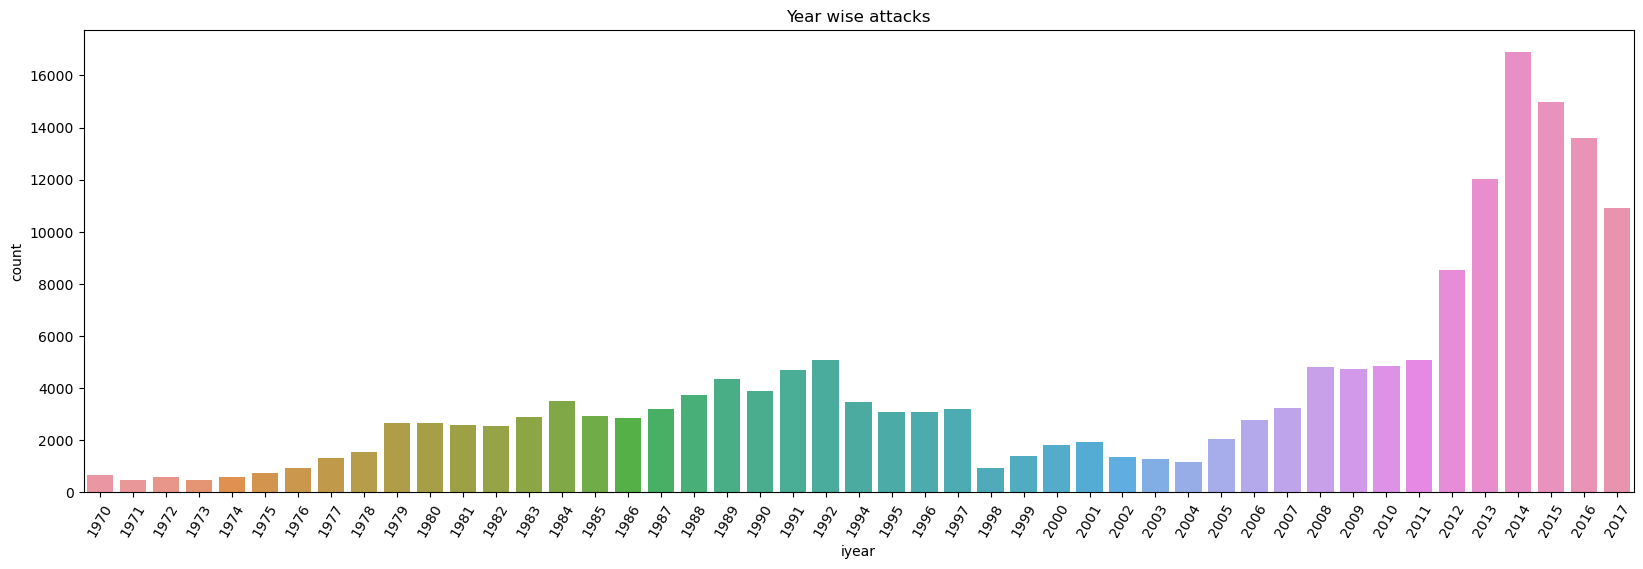

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['iyear']).set_title('Year wise attacks')
plt.xticks(rotation=60)
plt.show()

**More number of attacks in 2014**

Text(0.5, 1.0, 'Month wise attacks')

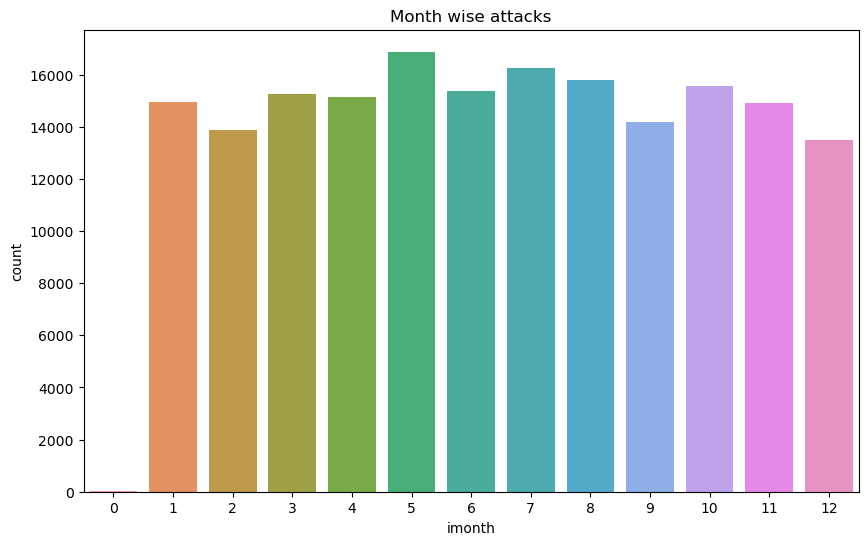

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['imonth']).set_title('Month wise attacks')

**Month can't be zeros, dropping those zeros**

In [27]:
data[data['imonth']==0]

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
1123,1972,0,0,0,160,Philippines,5,Southeast Asia,Capiz,Roxas,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
1690,1973,0,0,1,45,Colombia,3,South America,Unknown,unknown,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
2164,1974,0,0,0,69,France,8,Western Europe,Paris,Paris,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
2165,1974,0,0,0,98,Italy,8,Western Europe,Lazio,Rome,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
2744,1975,0,0,0,153,Pakistan,6,South Asia,Punjab,Rawalpindi,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
3484,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Hyland
3485,1976,0,0,0,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Hyland
4407,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
4408,1977,0,0,0,101,Japan,4,East Asia,Tokyo,Tokyo,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS


In [29]:
data.drop(data[data['imonth']==0].index,axis=0,inplace=True)

In [30]:
data[data['imonth']==0] # Now cleaned

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource


<Axes: xlabel='iday', ylabel='count'>

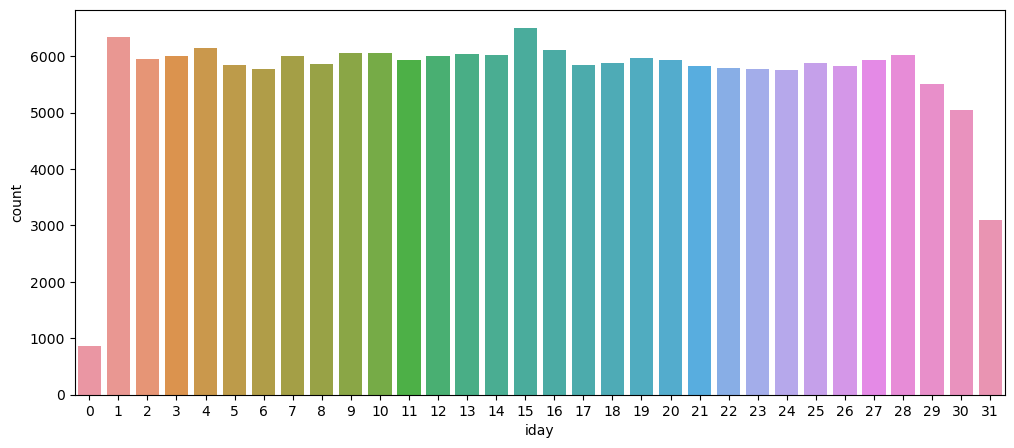

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['iday'])

In [33]:
# Zero days not possible hence removed thses columns...

In [34]:
data[data['iday']==0]

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,dbsource
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,PGIS
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
96,1970,3,0,0,160,Philippines,5,Southeast Asia,Metropolitian Manila,Manila,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,PGIS
165,1970,4,0,1,65,Ethiopia,11,Sub-Saharan Africa,Unknown,Unknown,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104603,2011,12,0,0,155,West Bank and Gaza Strip,10,Middle East & North Africa,West Bank,Nablus,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,START Primary Collection
104611,2011,12,0,0,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,Mandeo,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,START Primary Collection
104612,2011,12,0,0,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,Mandeo,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,START Primary Collection
104613,2011,12,0,0,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,Mandeo,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,START Primary Collection


In [35]:
data.drop(data[data['iday']==0].index,axis=0,inplace=True) # dropping 

<Axes: xlabel='iday', ylabel='count'>

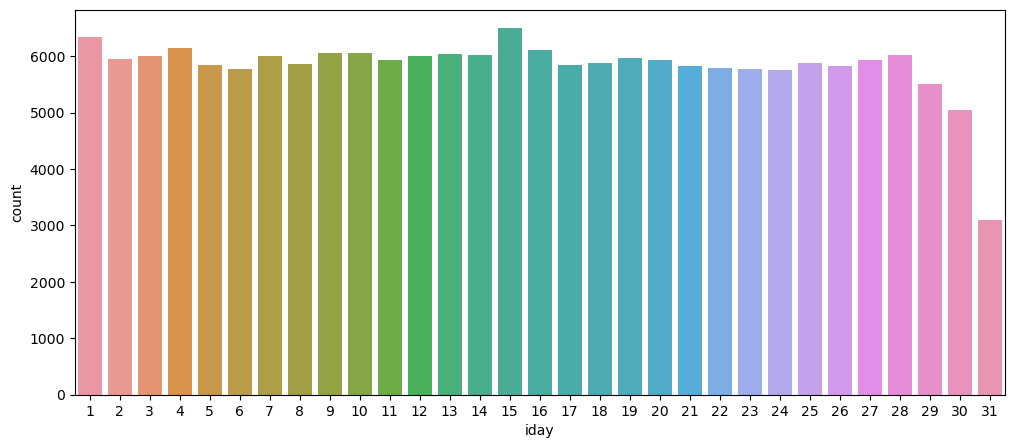

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['iday'])

In [37]:
country_wise=data['country_txt'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','country_txt':'Count'},inplace=True)
country_wise

,Country Name,Count
0,Iraq,24616
1,Pakistan,14331
2,Afghanistan,12718
3,India,11931
4,Colombia,8232
...,...,...
200,Andorra,1
201,South Vietnam,1
202,Wallis and Futuna,1
203,Falkland Islands,1


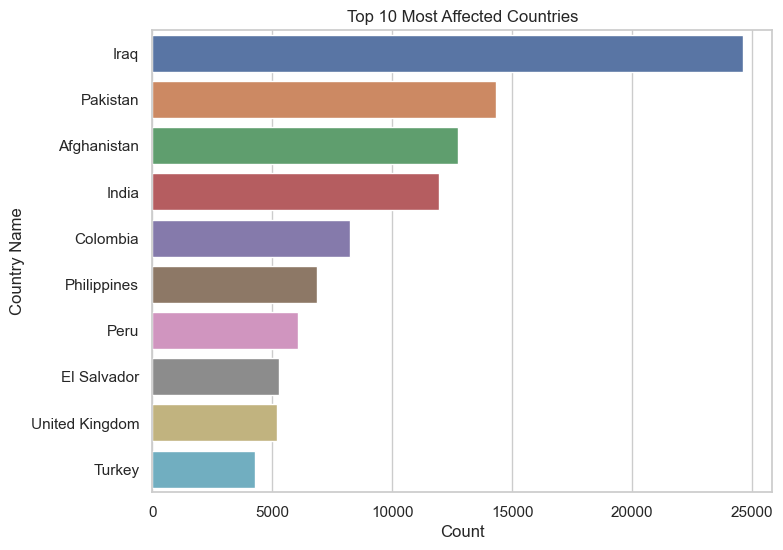

In [38]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))

# sns.set_color_codes("muted")
sns.color_palette("pastel") 
sns.barplot(x="Count", y="Country Name", data=country_wise[:10])
plt.title('Top 10 Most Affected Countries')
plt.show()

In [39]:
region_wise=data['region_txt'].value_counts().reset_index()
region_wise.rename(columns={"index":'Region Name','region_txt':'Count'},inplace=True)
region_wise

,Region Name,Count
0,Middle East & North Africa,50317
1,South Asia,44866
2,South America,18838
3,Sub-Saharan Africa,17450
4,Western Europe,16450
5,Southeast Asia,12438
6,Central America & Caribbean,10260
7,Eastern Europe,5136
8,North America,3416
9,East Asia,790


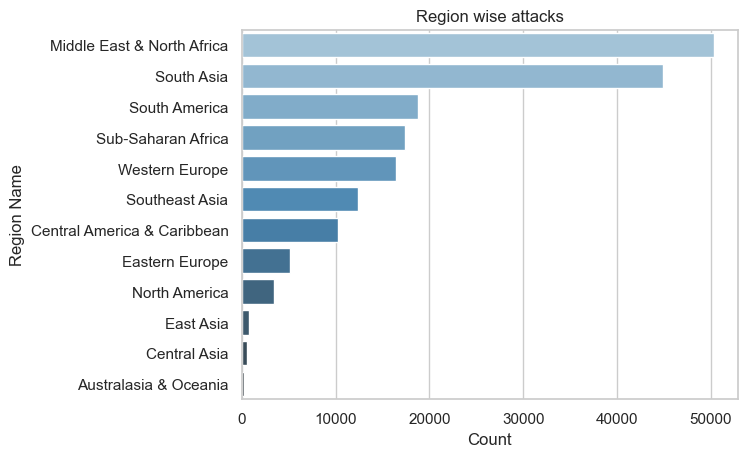

In [40]:
ax = sns.barplot(x="Count", y="Region Name", data=region_wise,
                 palette="Blues_d").set_title('Region wise attacks')

**Middle East & North Africe are most Affected regions**

In [41]:
city_wise=data['city'].value_counts().reset_index()
city_wise.rename(columns={"index":'City Name','city':'Count'},inplace=True)
city_wise

,City Name,Count
0,Unknown,10062
1,Baghdad,7582
2,Karachi,2647
3,Lima,2356
4,Mosul,2263
...,...,...
36545,H'doura,1
36546,Tamarasheni,1
36547,Kororamae,1
36548,Kitgum Matidi,1


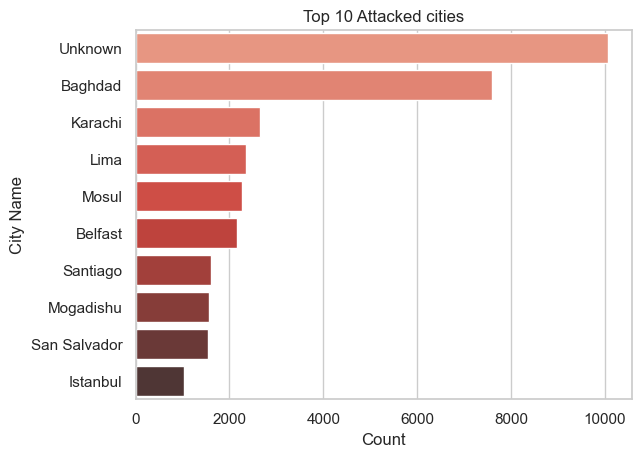

In [42]:
ax = sns.barplot(x="Count", y="City Name", data=city_wise[:10],
                 palette="Reds_d").set_title('Top 10 Attacked cities')

**Not registered in database and Baghdad are top affected by attacks**

In [43]:
attack_type=data['attacktype1_txt'].value_counts().reset_index()
attack_type.rename(columns={"index":'Attack type','attacktype1_txt':'Count'},inplace=True)
attack_type

,Attack type,Count
0,Bombing/Explosion,87931
1,Armed Assault,42548
2,Assassination,19191
3,Hostage Taking (Kidnapping),11015
4,Facility/Infrastructure Attack,10275
5,Unknown,7193
6,Unarmed Assault,1007
7,Hostage Taking (Barricade Incident),985
8,Hijacking,655


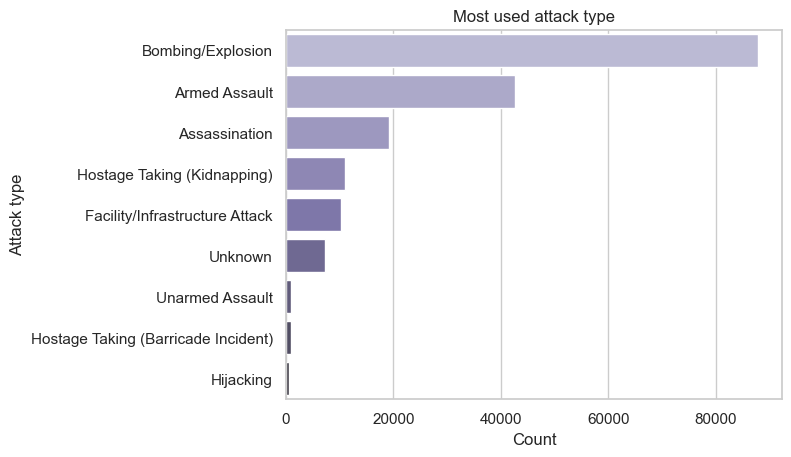

In [44]:
ax = sns.barplot(x="Count", y="Attack type", data=attack_type,
                 palette="Purples_d").set_title('Most used attack type')

In [45]:
target_type=data['targtype1_txt'].value_counts().reset_index()
target_type.rename(columns={"index":'Target type','targtype1_txt':'Count'},inplace=True)
target_type

,Target type,Count
0,Private Citizens & Property,43255
1,Military,27911
2,Police,24451
3,Government (General),21171
4,Business,20505
5,Transportation,6774
6,Utilities,6007
7,Unknown,5882
8,Religious Figures/Institutions,4428
9,Educational Institution,4296


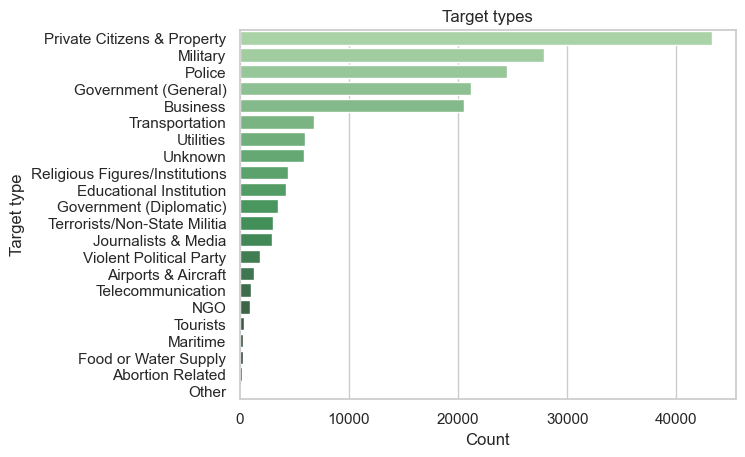

In [46]:
ax = sns.barplot(x="Count", y="Target type", data=target_type,
                 palette="Greens_d").set_title('Target types')

In [47]:
target1_type=data['target1'].value_counts().reset_index()
target1_type.rename(columns={"index":'Target type','target1':'Count'},inplace=True)
target1_type

,Target type,Count
0,Civilians,7088
1,Unknown,5915
2,Soldiers,3154
3,Patrol,2942
4,Checkpoint,2905
...,...,...
85398,town of gagra,1
85399,Town of San Juan de Arama,1
85400,Embassy. Occupied peacefully. Asked for politi...,1
85401,Houari Boumedienne Airport,1


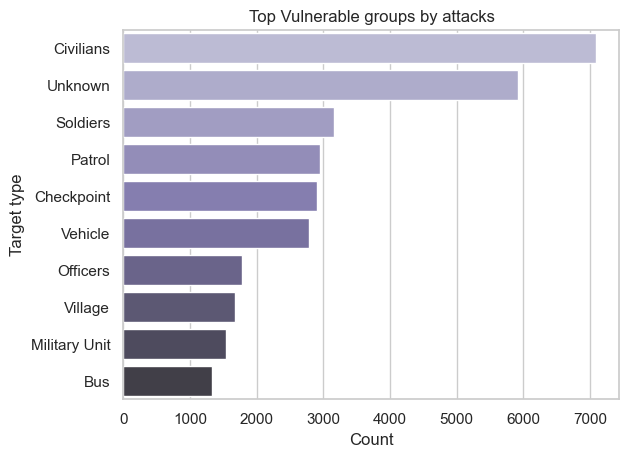

In [48]:
ax = sns.barplot(x="Count", y="Target type", data=target1_type[:10],
                 palette="Purples_d").set_title('Top Vulnerable groups by attacks')

In [49]:
gang_name=data['gname'].value_counts().reset_index()
gang_name.rename(columns={"index":'Gang','gname':'Count'},inplace=True)
gang_name

,Gang,Count
0,Unknown,82457
1,Taliban,7469
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4532
4,Farabundo Marti National Liberation Front (FMLN),3343
...,...,...
3512,Sabaot Tribe,1
3513,Dnester region guerrilas,1
3514,Harakat-i-Inqilahi-i-Islami,1
3515,Central University students,1


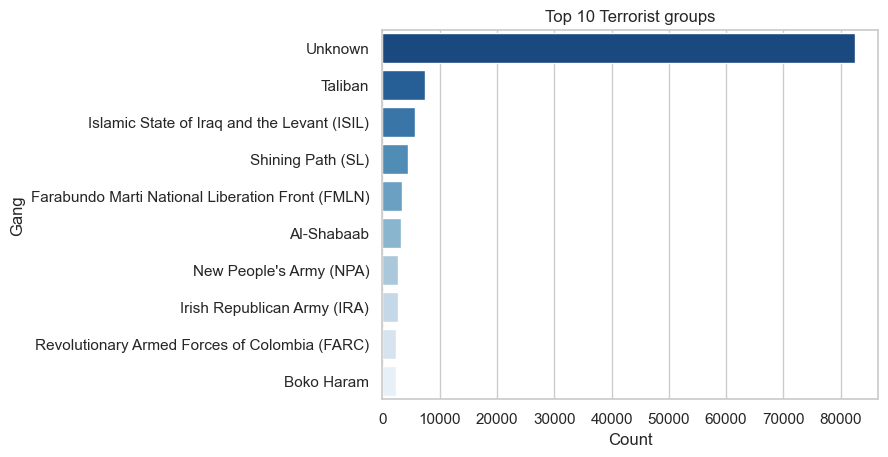

In [50]:
ax = sns.barplot(x="Count", y="Gang", data=gang_name[:10],
                 palette="Blues_r").set_title('Top 10 Terrorist groups')

In [51]:
weapon_name=data['weaptype1_txt'].value_counts().reset_index()
weapon_name.rename(columns={"index":'Weapons','weaptype1_txt':'Count'},inplace=True)
weapon_name

,Weapons,Count
0,Explosives,92099
1,Firearms,58347
2,Unknown,14890
3,Incendiary,11058
4,Melee,3624
5,Chemical,319
6,Sabotage Equipment,138
7,Vehicle (not to include vehicle-borne explosiv...,135
8,Other,110
9,Fake Weapons,33


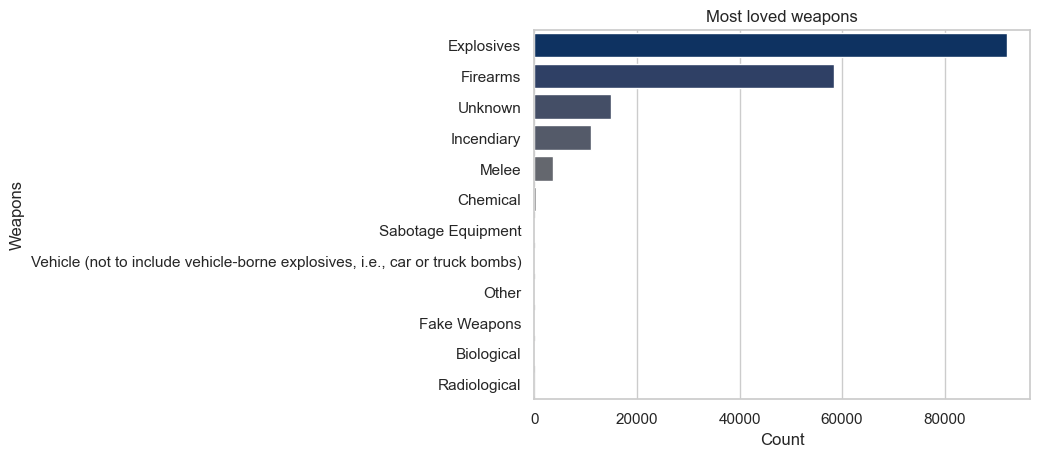

In [53]:
ax = sns.barplot(x="Count", y="Weapons", data=weapon_name,
                 palette="cividis").set_title('Most loved weapons')